# 00_brownian_motion

## References

In the following notes, I follow:

* For formal concepts in Brownian motion, I'm following [Glasserman](https://link.springer.com/book/10.1007/978-0-387-21617-1).

* For the numerical approach, I'm following this [tutorial]() 

* And () for the tips on making pyplot look better.

## Definition of Brownian Motion

Standard one-dimensional (1D) Brownian motion is defined by the stochastic process $\{W(t), 0 \leq t \leq T\}$ such that:

* $W(0) = 0$;

* $t \mapsto W(t)$ in $[0, t]$ is a continuous function.

* Increments $W(t_k) - W(t_{k-1})$ are independent for any $k$. 

* $W(t) - W(s)$ follows a normal distribution of mean $0$ and variance $t-s$. 

A process $X(t)$ with a drift $\mu$ and diffusion coefficient $\sigma$ is a **standard Brownian motion** if 

$ W(t) = \dfrac{X(t) - \mu t}{\sigma}$

wich defines 

$ X(t) = \mu t + \sigma W(t)$

and solves the stochastic differential equation

$ \text{d}X(t) = \mu \text{d}t + \sigma \text{d}W(t)$

For the random-walk construction by Glasserman, 

$W(t_{i+1}) = W(t_{i}) + \sqrt{t_{i+1}-t_i}Z_{i+1}$ (A)
 
where $Z_i$ elements are independent random variables. The standard Brownian motion becomes

$X(t_{i+1}) = X(t_{i}) + \mu (t_{i+1}-t_{i}) + \sigma \sqrt{t_{i+1}-t_i}Z_{i+1}$  (B)

## Visualizing and Interpreting Brownian Motion 

* Follow () and () procedure to find W(t) and X(t).
* Interpret W(t) basic behaviour given diffusion coefficient $\sigma$.
* Interpret X(t) and the effect of drift $\mu$. 


### Brownian Motion W(t)

* Find $3$ random paths $W(t_{i})$ with $500$ points each, *i.e.*, $0 \leq i < 500$.
* Utilize ```numpy``` to generate the $Z_i$ random variables, using a normal distribution (centered around 0 with variance 1). 
* Define sample space $[0,T]$, with $T=1$.

In [81]:
import numpy as np

paths = 3
points = 500
Z = np.random.default_rng(120).normal(0, 1, (paths, points))

T = 1
t = np.linspace(0, T, points)

* Define a function to calculate Brownian-motion steps, eq. (A), given the variables $Z$.

In [82]:
def brownian_motion(paths, points, t, Z):
    W = np.zeros((paths, points))
    for i in range(0, points-1):
        i = i + 1
        W[:, i] = W[:, i-1] + np.sqrt(t[i]-t[i-1])*Z[:,i]
    return W

* Run the ```brownian_motion``` funtion for the number of path and points defined above.

In [83]:
W = brownian_motion(paths, points, t, Z)

### Visualizing Brownian Motion W(t)

* Utilize the tips suggested by () in () for better-looking pyplot to visualize $W(t)$.
* Import ```pyplot``` and change basic parameters.
* Plot the number of ```paths``` stored in ```W(t)```

In [84]:
import matplotlib.pyplot as plt
SIZE_DEFAULT = 18
SIZE_LARGE = 22
plt.rc("font", family="Helvetica")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_DEFAULT)  # fontsize of the tick labels

* Define a function to plot as many $W(t)$ as defined by ```paths```.

In [85]:
def plot_1D_brownian(t, W, colors=[], labels=[], baseline = True, save = None, ylabel=""):

    # Plot all W
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
    for i in range(0, W.shape[0]):
        ax.plot(t, W[i, :], colors[i])
        ax.text(t[-1]*1.01, W[i,-1], labels[i],  color=colors[i], fontweight="bold", horizontalalignment="left", verticalalignment="center")
    
    # Plot a straigth line around zero ("baseline")
    if baseline == True:
        ax.plot(t, np.zeros(len(t)), "--", color="gray")
        ax.text(t[-1]*1.01, 0, "Baseline", color="gray", fontweight="bold", horizontalalignment="left", verticalalignment="center")

    # Hide box
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Title and labels
    ax.set_title("Brownian Motion")
    ax.set_xlabel("t (Time)")
    ax.set_ylabel(ylabel)
    ax.set_xlim([t[0], t[-1]])

    # Save and show
    plt.tight_layout()
    if save != None:
        plt.savefig(save)
    plt.show()

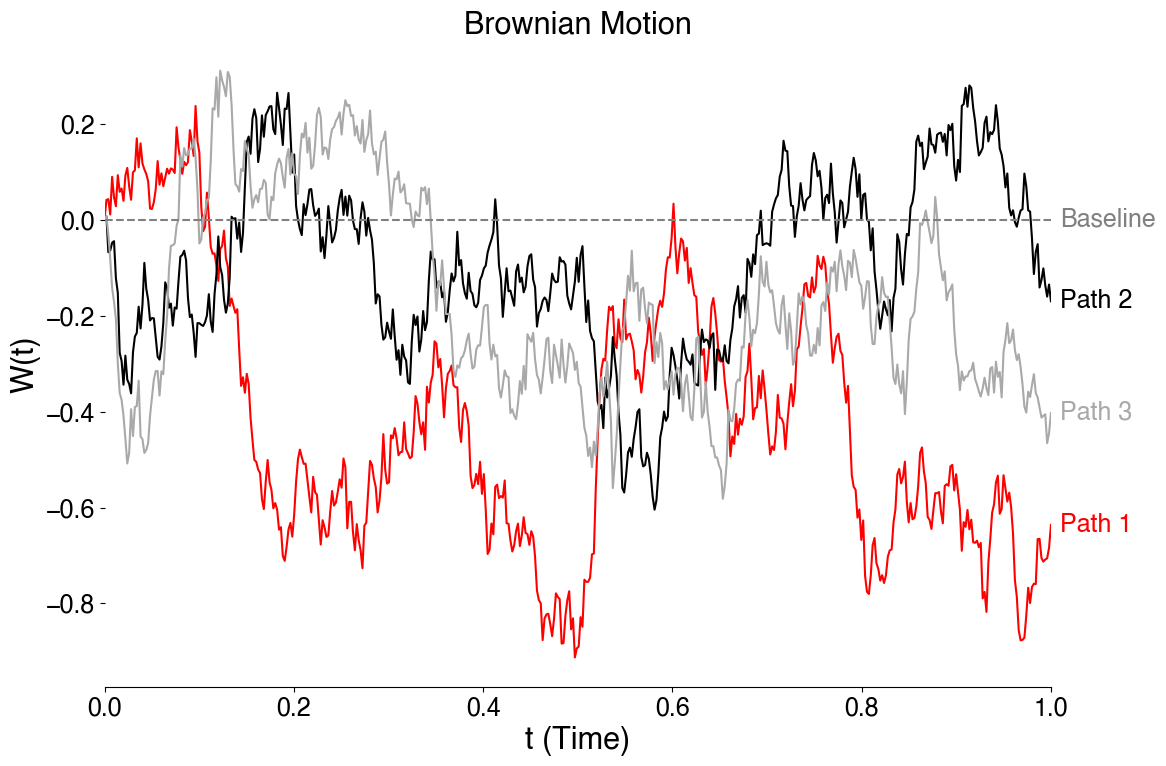

In [86]:
colors = ["red", "black", "darkgray"]
labels = ["Path 1", "Path 2", "Path 3"]
plot_1D_brownian(t, W, colors=colors, labels=labels, ylabel="W(t)")

### Interpreting W(t)

* $Z_{i}$ is normal distribution around 0, so it has both positive or negative numbers.
* Hence $\sigma \sqrt{t_{i+1}-t_i}Z_{i+1}$ will be either a positive or negative increment, making $W(t_i)$ respectively "up" or "down" in relation to $W(t_{i-1})$.

## Visualizing and Interpreting the Standard Brownian Motion X(t)

* Define a function to calculate X(t), defined in eq. (B). 

In [135]:
def standard_brownian_motion(paths, points, t, Z, mu, sigma):
    X = np.zeros((paths, points))
    for i in range(0, points-1):
        i = i + 1
        X[:, i] = X[:, i-1] + mu*(t[i]-t[i-1]) + sigma*np.sqrt(t[i]-t[i-1])*Z[:,i]
    return X

* Set drift and coefficient parameters to $\mu = 0.5$ and $\sigma = 0.5$ respectively.
* Find $3$ random paths $X(t_{i})$ with $500$ points each, *i.e.*, $0 \leq i < 500$.
* Utilize ```numpy``` to generate the $Z_i$ random variables, using the previously define $Z_i$. 
* Define sample space $[0,T]$, with $T=1$.

In [136]:
mu = 0.5
sigma = 0.5
X = standard_brownian_motion(paths, points, t, Z, mu, sigma)

* Plot the curves using the same plotting function defined above.

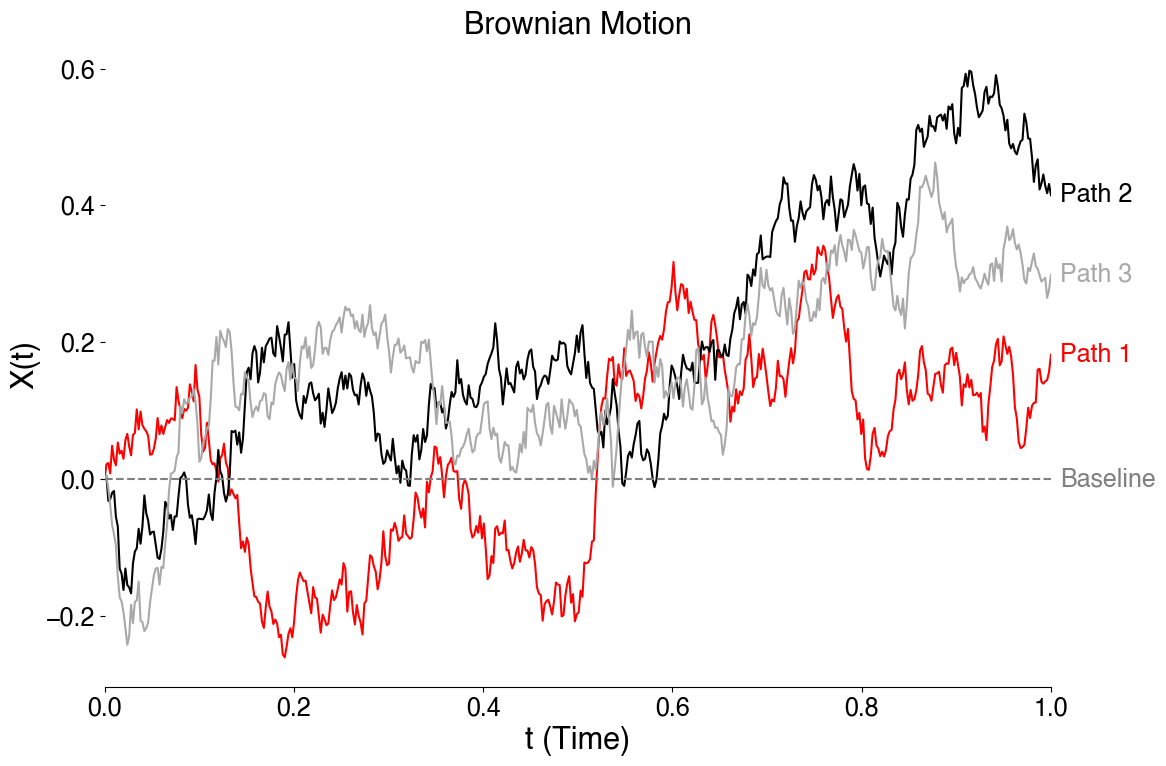

In [137]:
plot_1D_brownian(t, X, colors=colors, labels=labels, ylabel="X(t)")

### Interpreting X(t), $\mu$ and $\sigma$

* Understand role of $\sigma$ by fixing $\mu = 0.5$ and calculating $X(t)$ for different $\sigma$ for the first path.
* Set $\sigma$ to $0.25$, $0.50$ and $0.75$ and plot respective curves for ```Z[0]```.
* Compare the results, noticing how the different $\sigma$ values change the Brownian curve.

In [203]:
mu = 1.0
sigmas = [0.25, 0.50, 0.75]
X_sigma = np.zeros((len(sigmas), points))

i = 0
for sigma in sigmas:
    X = standard_brownian_motion(paths, points, t, Z, mu, sigma)
    X_sigma[i,:] = X[0, :]
    i += 1

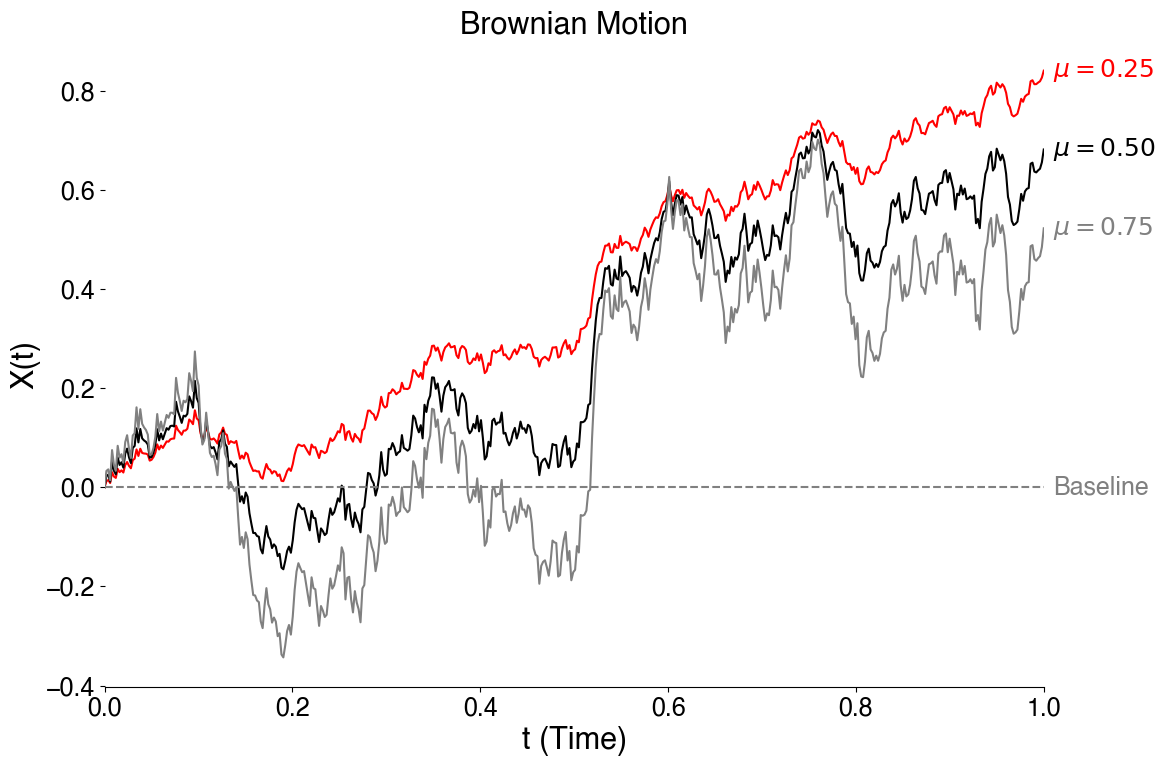

In [205]:
colors = ["red", "black", "gray"]
labels = [r"$\mu={0:4.2f}$".format(sigma) for sigma in sigmas]
plot_1D_brownian(t, X_sigma, colors=colors, labels=labels, ylabel="X(t)")

* The diffusion constant $\sigma$ determine how the motion "jumps around" from the initial value $X(0)$ and from one increment to the other.
* A large $\sigma$ (such as 0.75 in the plot) may represent a motion that is more inconsistent in drifting from its initial position.

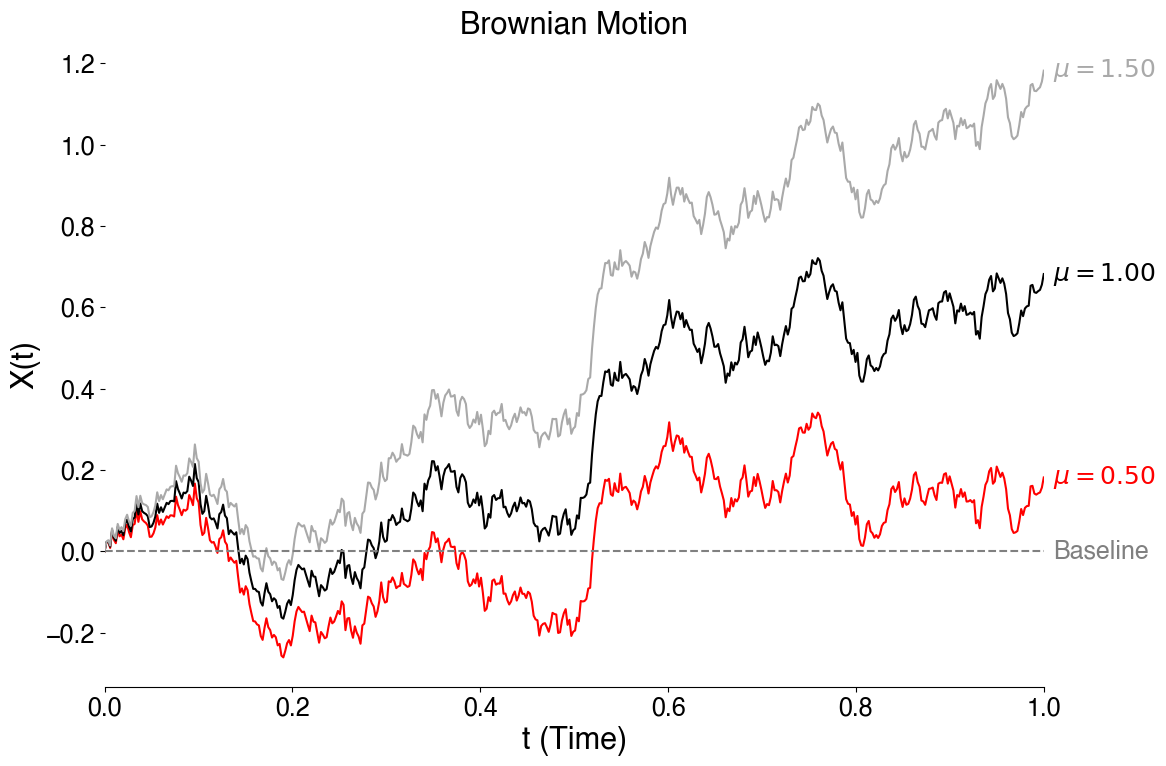

In [180]:
sigma = 0.5
mus =  [0.5, 1.00, 1.50]
X_mu = np.zeros((len(mus), points))

i = 0
for mu in mus:
    X = standard_brownian_motion(paths, points, t, Z, mu, sigma)
    X_mu[i,:] = X[0, :]
    i += 1
    
labels = [r"$\mu={0:4.2f}$".format(mu) for mu in mus]
plot_1D_brownian(t, X_mu, colors=colors, labels=labels, ylabel="X(t)")

* The drift constant $\mu$ "drifts" the Brownian curve from the baseline, at an angle proportional to it.
* It is a measure of how much the motion drifts from the initial position $X(0)$.

* Compare the curves for two diffusion constants $\mu \in [0.25, 0.50]$ and two drift constants $\sigma \in [0.0, 1.0]$ for a direct comparison.

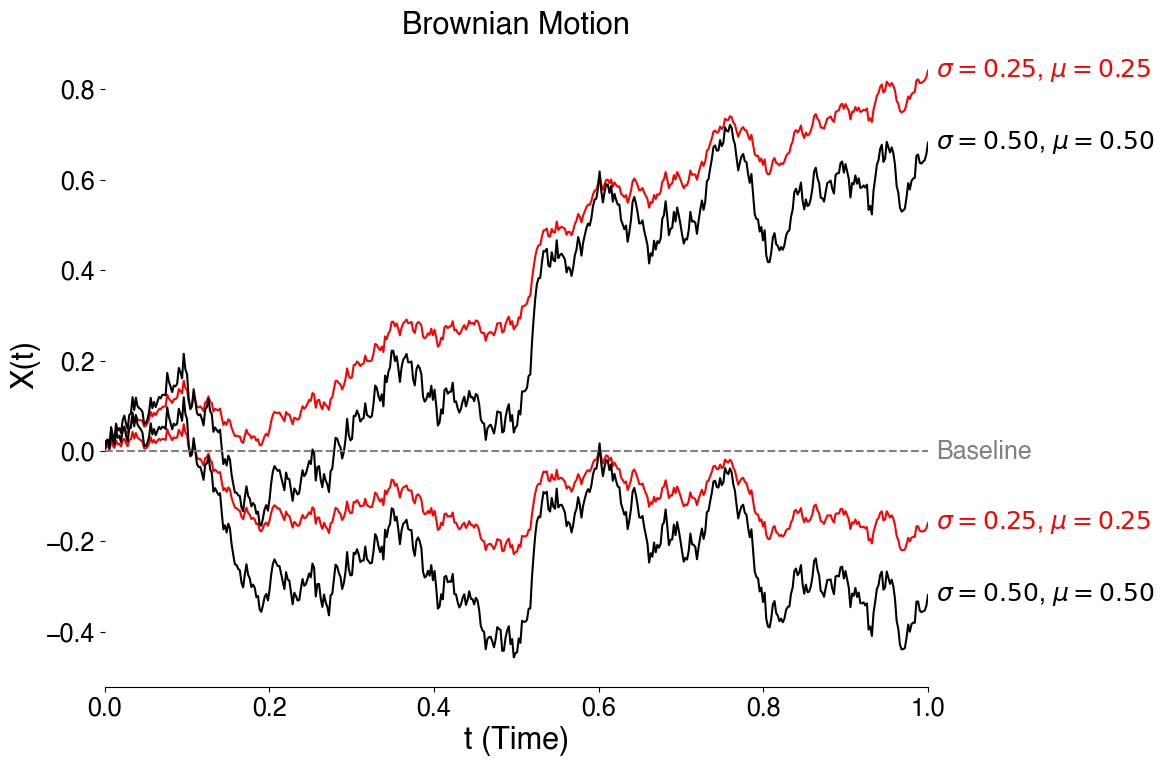

In [197]:
sigmas = [0.25, 0.50]
mus    = [0.0,  1.0]
Xs = np.zeros((len(sigmas)+len(mus), points))
labels = []

i = 0
for sigma in sigmas:
    for mu in mus:
        X = standard_brownian_motion(paths, points, t, Z, mu, sigma)
        Xs[i,:] = X[0, :]
        labels.append (r"$\sigma={0:4.2f}$, $\mu={0:4.2f}$".format(sigma, mu))
        i += 1

colors = ["red", "red", "black", "black"]
plot_1D_brownian(t, Xs, colors=colors, labels=labels, ylabel="X(t)")

* It is more clear that $\sigma$ represents a "jump around" a baseline, which "drifts" from the initial position according to $\sigma$.

# Conclusions

* Brownian motion is an stochastic process in which, among other properties, increments $W(t_i)-W(t_{i-1})$ are independent and follow a normal distribution.
* For a standard Brownian motion, $W(t)$ follows a process $X(t)$, a drift constant $\mu$ and a diffusion constant $\sigma$. 
* Following the random walk construction, $X(t_{i+1}) = X(t_{i}) + \mu (t_{i+1}-t_{i}) + \sigma \sqrt{t_{i+1}-t_i}Z_{i+1}$, where $Z_i$ is a random variable.
* While $\sigma$ determines how the motion will "jump around" from increment to increment, $\mu$ determines how the motion drifts from the initial $X(0)$.